# Using Logistic Regession to Forcast the IPO Market

## First thing to do is import packages for the model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as plot
from pandas import DataFrame
from patsy import dmatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from patsy import dmatrix
%matplotlib inline

## Before deciding which strategy to use, we need to look at the market to try and derive inferences from it.  We are getting our IPO data from www.iposcoop.com.

In [2]:
ipos = pd.read_csv(r'/Users/eugene.brink/desktop/SCOOP-rating-performance.csv', encoding="utf-8-sig")
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed
0,1/8/19,MMTEC,MTC,WestPark Capital,$4.00,$5.91,$7.55,88.75%,$1.91,$3.55,N/C,NaN
1,1/29/19,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,$10.00,$10.00,$10.01,0.10%,$0.00,$0.01,1,NaN
2,1/30/19,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,$20.00,$20.00,$20.20,1.00%,$0.00,$0.20,1,NaN
3,1/31/19,New Fortress Energy,NFE,Morgan Stanley/ Barclays,$14.00,$13.25,$13.07,-6.64%,($0.75),($0.93),1,NaN
4,1/31/19,Pivotal Acquisition,PVT.U,Cantor,$10.00,$10.05,$10.10,1.00%,$0.05,$0.10,1,NaN
5,2/1/19,Gores Metropoulos,GMHIU,Deutsche Bank Securities/ Credit Suisse/ Goldm...,$10.00,$10.14,$10.12,1.20%,$0.14,$0.12,1,NaN
6,2/6/19,Wealthbridge Acquisition,HHHHU,Chardan,$10.00,$10.01,$10.01,0.10%,$0.01,$0.01,1,NaN
7,2/7/19,Alector,ALEC,Morgan Stanley/ BofA Merrill Lynch/ Cowen/ Bar...,$19.00,$18.70,$18.00,-5.26%,($0.30),($1.00),2,Missed
8,2/7/19,Monocle Acquisition,MNCLU,Cowen/ Chardan,$10.00,$10.00,$10.01,0.10%,$0.00,$0.01,1,NaN
9,2/8/19,Gossamer Bio,GOSS,BofA Merrill Lynch/ Leerink Partners/ Barclays...,$16.00,$19.00,$17.94,12.13%,$3.00,$1.94,2,NaN


## I did an initial cleaning of the data using Pandas

In [3]:
ipos = ipos.applymap(lambda x: x if not '$' in str(x) else
x.replace('$',''))
ipos = ipos.applymap(lambda x: x if not '%' in str(x) else
x.replace('%',''))
ipos = ipos.applymap(lambda x: x if not '(' in str(x) else
x.replace('(',''))
ipos = ipos.applymap(lambda x: x if not ')' in str(x) else
x.replace(')',''))
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed
0,1/8/19,MMTEC,MTC,WestPark Capital,4.00,5.91,7.55,88.75,1.91,3.55,N/C,NaN
1,1/29/19,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,10.00,10.00,10.01,0.10,0.00,0.01,1,NaN
2,1/30/19,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,20.00,20.00,20.20,1.00,0.00,0.20,1,NaN
3,1/31/19,New Fortress Energy,NFE,Morgan Stanley/ Barclays,14.00,13.25,13.07,-6.64,0.75,0.93,1,NaN
4,1/31/19,Pivotal Acquisition,PVT.U,Cantor,10.00,10.05,10.10,1.00,0.05,0.10,1,NaN
5,2/1/19,Gores Metropoulos,GMHIU,Deutsche Bank Securities/ Credit Suisse/ Goldm...,10.00,10.14,10.12,1.20,0.14,0.12,1,NaN
6,2/6/19,Wealthbridge Acquisition,HHHHU,Chardan,10.00,10.01,10.01,0.10,0.01,0.01,1,NaN
7,2/7/19,Alector,ALEC,Morgan Stanley/ BofA Merrill Lynch/ Cowen/ Bar...,19.00,18.70,18.00,-5.26,0.30,1.00,2,Missed
8,2/7/19,Monocle Acquisition,MNCLU,Cowen/ Chardan,10.00,10.00,10.01,0.10,0.00,0.01,1,NaN
9,2/8/19,Gossamer Bio,GOSS,BofA Merrill Lynch/ Leerink Partners/ Barclays...,16.00,19.00,17.94,12.13,3.00,1.94,2,NaN


In [4]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3291 entries, 0 to 3290
Data columns (total 12 columns):
Date                         3291 non-null object
Issuer                       3291 non-null object
Symbol                       3291 non-null object
 Lead/Joint-Lead Managers    3291 non-null object
 Offer Price                 3291 non-null object
Opening Price                3291 non-null object
1st Day Close                3291 non-null object
1st Day % Px Chng            3290 non-null object
$ Change Opening             3291 non-null object
$ Change Close               3291 non-null object
Star Ratings                 3291 non-null object
Performed                    378 non-null object
dtypes: object(12)
memory usage: 308.6+ KB


## Clean further by removing N/C and replacing with 0 as well as changing the data types

In [5]:
ipos.replace('N/C',0, inplace=True)

In [6]:
ipos.columns = ipos.columns.str.strip()

In [7]:
ipos['Date'] = pd.to_datetime(ipos['Date'])
ipos.columns = ipos.columns.str.strip()
ipos['Offer Price'] = ipos['Offer Price'].astype('float')
ipos.columns = ipos.columns.str.strip()
ipos['Opening Price'] = ipos['Opening Price'].astype('float')
ipos.columns = ipos.columns.str.strip()
ipos['1st Day Close'] = ipos['1st Day Close'].astype('float')
ipos.columns = ipos.columns.str.strip()
ipos['1st Day % Px Chng'] = ipos['1st Day % Px Chng'].astype('float')
ipos.columns = ipos.columns.str.strip()
ipos['$ Change Close'] = ipos["$ Change Close"].astype('float')
ipos.columns = ipos.columns.str.strip()
ipos['$ Change Opening'] = ipos["$ Change Opening"].astype('float')
ipos.columns = ipos.columns.str.strip()
ipos['Star Ratings'] = ipos['Star Ratings'].astype('int')
ipos.columns = ipos.columns.str.strip()
ipos['Performed'] = ipos ['Performed'].astype('object')

In [8]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3291 entries, 0 to 3290
Data columns (total 12 columns):
Date                        3291 non-null datetime64[ns]
Issuer                      3291 non-null object
Symbol                      3291 non-null object
Lead/Joint-Lead Managers    3291 non-null object
Offer Price                 3291 non-null float64
Opening Price               3291 non-null float64
1st Day Close               3291 non-null float64
1st Day % Px Chng           3290 non-null float64
$ Change Opening            3291 non-null float64
$ Change Close              3291 non-null float64
Star Ratings                3291 non-null int64
Performed                   378 non-null object
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 308.6+ KB


## Lets take a look at the average first day % gain

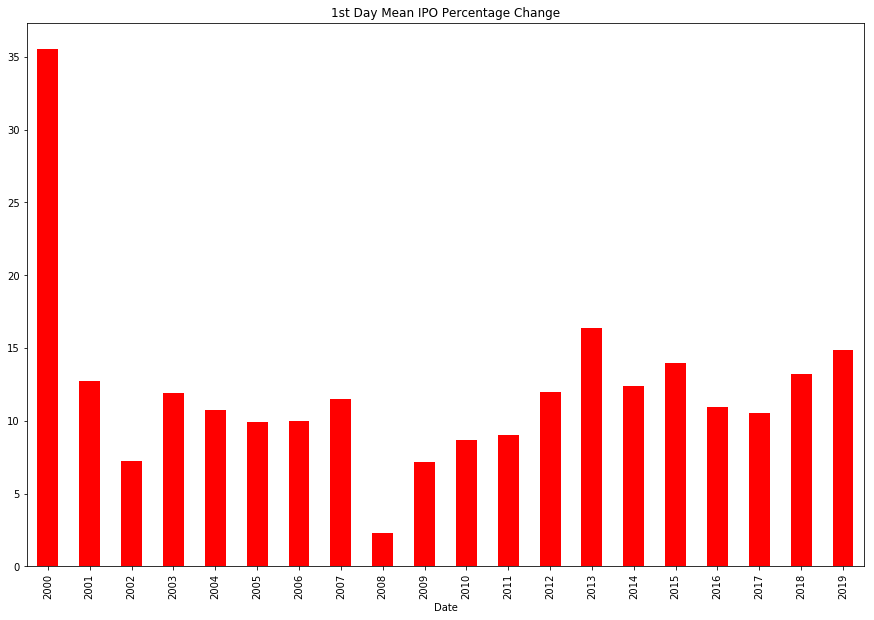

In [9]:
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng'].mean().plot(kind='bar', figsize=(15,10), color='r', title='1st Day Mean IPO Percentage Change')


## Distribution by Mean.. Possible outlyers

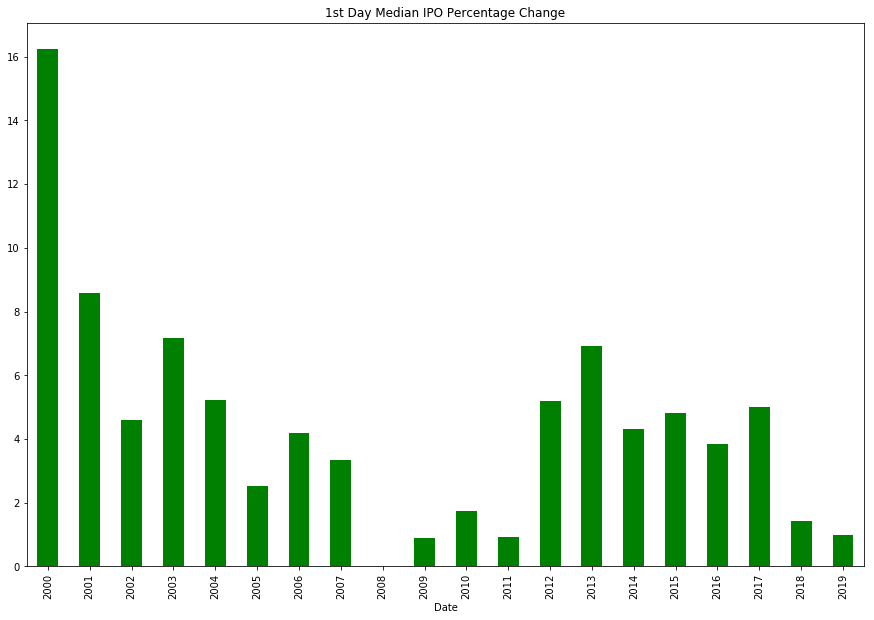

In [10]:
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng']\
.median().plot(kind='bar', figsize=(15,10), color='g', title='1st Day Median IPO Percentage Change')

In [11]:
ipos['1st Day % Px Chng'].describe()

count    3290.000000
mean       13.143932
std        27.407956
min       -41.080000
25%         0.000000
50%         4.210000
75%        19.115000
max       353.850000
Name: 1st Day % Px Chng, dtype: float64

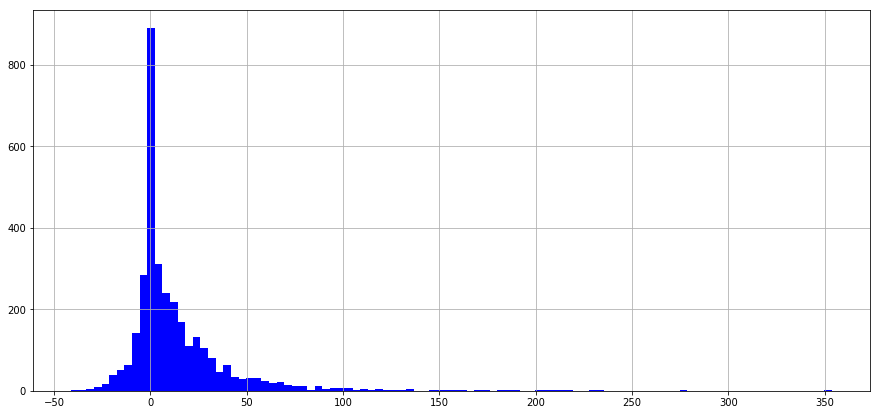

In [12]:
ipos['1st Day % Px Chng'].hist(figsize=(15,7), bins=100, color='b')

## Another Checkpoint I added 2 new columns $ Change open to close and % change open to close

In [13]:
ipos['$ Change Open to Close'] = ipos['$ Change Close'] - ipos['$ Change Opening']
ipos['% Change Open to Close'] = (ipos['$ Change Open to Close']/ipos['Opening Price']) * 100
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed,$ Change Open to Close,% Change Open to Close
0,2019-01-08,MMTEC,MTC,WestPark Capital,4.00,5.91,7.55,88.75,1.91,3.55,0,NaN,1.64,27.749577
1,2019-01-29,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,10.00,10.00,10.01,0.10,0.00,0.01,1,NaN,0.01,0.100000
2,2019-01-30,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,20.00,20.00,20.20,1.00,0.00,0.20,1,NaN,0.20,1.000000
3,2019-01-31,New Fortress Energy,NFE,Morgan Stanley/ Barclays,14.00,13.25,13.07,-6.64,0.75,0.93,1,NaN,0.18,1.358491
4,2019-01-31,Pivotal Acquisition,PVT.U,Cantor,10.00,10.05,10.10,1.00,0.05,0.10,1,NaN,0.05,0.497512
5,2019-02-01,Gores Metropoulos,GMHIU,Deutsche Bank Securities/ Credit Suisse/ Goldm...,10.00,10.14,10.12,1.20,0.14,0.12,1,NaN,-0.02,-0.197239
6,2019-02-06,Wealthbridge Acquisition,HHHHU,Chardan,10.00,10.01,10.01,0.10,0.01,0.01,1,NaN,0.00,0.000000
7,2019-02-07,Alector,ALEC,Morgan Stanley/ BofA Merrill Lynch/ Cowen/ Bar...,19.00,18.70,18.00,-5.26,0.30,1.00,2,Missed,0.70,3.743316
8,2019-02-07,Monocle Acquisition,MNCLU,Cowen/ Chardan,10.00,10.00,10.01,0.10,0.00,0.01,1,NaN,0.01,0.100000
9,2019-02-08,Gossamer Bio,GOSS,BofA Merrill Lynch/ Leerink Partners/ Barclays...,16.00,19.00,17.94,12.13,3.00,1.94,2,NaN,-1.06,-5.578947


In [14]:
ipos['% Change Open to Close'].describe()

count    3291.000000
mean        2.746685
std        10.697168
min      -119.428571
25%        -1.132931
50%         0.769231
75%         5.377493
max       113.333333
Name: % Change Open to Close, dtype: float64

## Based on the stats (min and max) definatley some bad data, more investigation

In [15]:
ipos[ipos['% Change Open to Close']<-106]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed,$ Change Open to Close,% Change Open to Close
12,2019-02-13,IMAC Holdings,IMACW,Dawson James Securities/ Cuttone,5.0,3.50,4.18,-16.40,5.00,0.82,0,NaN,-4.18,-119.428571
767,2015-11-20,Duluth Holdings,DLTH,William Blair/ Baird/ Raymond James/ BMO Capit...,12.0,5.15,13.36,11.33,6.85,1.36,1,NaN,-5.49,-106.601942


In [16]:
ipos.loc[12,'Opening Price'] = ipos.loc[12, 'Offer Price'] 

In [17]:
ipos.loc[767,'Opening Price'] = ipos.loc[767, 'Offer Price'] 

In [18]:
ipos[ipos['% Change Open to Close']<-53]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed,$ Change Open to Close,% Change Open to Close
12,2019-02-13,IMAC Holdings,IMACW,Dawson James Securities/ Cuttone,5.0,5.00,4.18,-16.40,5.00,0.82,0,NaN,-4.18,-119.428571
767,2015-11-20,Duluth Holdings,DLTH,William Blair/ Baird/ Raymond James/ BMO Capit...,12.0,12.00,13.36,11.33,6.85,1.36,1,NaN,-5.49,-106.601942
2385,2005-04-18,Terra Nova Acquisition,TNVAU,EarlyBird Capital,6.0,6.09,6.22,3.67,6.22,0.22,1,NaN,-6.00,-98.522167


In [19]:
ipos.loc[12,'Opening Price'] = ipos.loc[12, 'Offer Price'] 

In [20]:
ipos.loc[767,'Opening Price'] = ipos.loc[767, 'Offer Price'] 

In [21]:
ipos.loc[2385,'Opening Price'] = ipos.loc[2385, 'Offer Price'] 

## Eliminated bad data and now ready to move on with model

In [22]:
ipos['$ Chg Opening'] = ipos['Opening Price'] - ipos['Offer Price']
ipos['$ Chg Close'] = ipos['1st Day Close'] - ipos['Offer Price']
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100
ipos['% Chg Open to Close'].describe()

count    3291.000000
mean        1.261143
std        10.545560
min       -49.281222
25%        -2.894817
50%         0.000000
75%         3.975049
max       113.333333
Name: % Chg Open to Close, dtype: float64

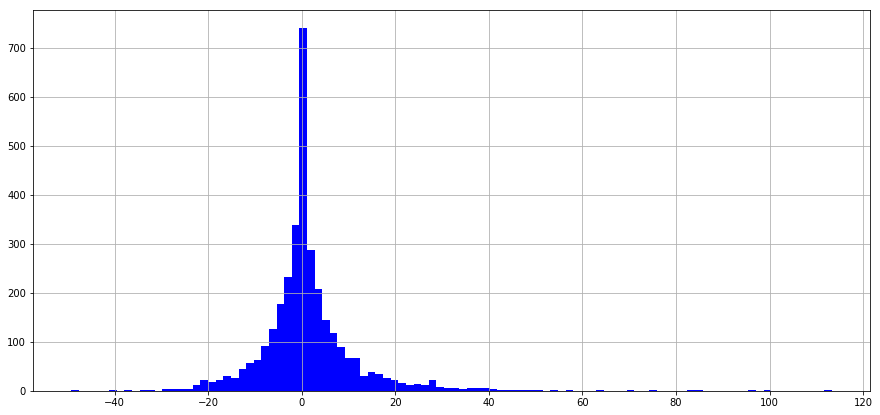

In [23]:
ipos['% Chg Open to Close'].hist(figsize=(15,7), bins=100, color='blue')

## Defining a strategy

In [24]:
ipos[ipos['Date']>='2015-01-01']['$ Chg Open to Close'].describe()

count    771.000000
mean       0.169131
std        2.213105
min       -8.950000
25%       -0.570000
50%        0.000000
75%        0.550000
max       20.040000
Name: $ Chg Open to Close, dtype: float64

In [25]:
ipos[ipos['Date']>='2015-01-01']['$ Chg Open to Close'].sum()

130.39999999999998

In [26]:
ipos[(ipos['Date']>='2015-01-01')&(ipos['$ Chg Open to Close']>0)]['$ Chg Open to Close'].describe()

count    346.000000
mean       1.482746
std        2.422287
min        0.010000
25%        0.150000
50%        0.665000
75%        1.727500
max       20.040000
Name: $ Chg Open to Close, dtype: float64

In [27]:
ipos[(ipos['Date']>='2015-01-01')&(ipos['$ Chg Open to Close']<0)]['$ Chg Open to Close'].describe()

count    364.000000
mean      -1.051181
std        1.292278
min       -8.950000
25%       -1.362500
50%       -0.640000
75%       -0.190000
max       -0.010000
Name: $ Chg Open to Close, dtype: float64

## Use Feature Engineering to develop predictive model, such as underwriters, day and/or month of trades, etc

## Download S&P index information from Yahoo Finance

In [28]:
sp = pd.read_csv(r'/Users/eugene.brink/desktop/spy.csv', encoding="utf-8-sig")
sp.sort_values('Date', inplace=True)
sp.reset_index(drop=True, inplace=True)
sp

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/10/00,1441.469971,1464.359985,1441.469971,1457.599976,1457.599976,1064800000
1,1/10/01,1300.800049,1313.760010,1287.280029,1313.270020,1313.270020,1296500000
2,1/10/02,1155.140015,1159.930054,1150.849976,1156.550049,1156.550049,1299000000
3,1/10/03,927.580017,932.890015,917.659973,927.570007,927.570007,1485400000
4,1/10/05,1186.189941,1194.780029,1184.800049,1190.250000,1190.250000,1490400000
5,1/10/06,1290.150024,1290.150024,1283.760010,1289.689941,1289.689941,2373080000
6,1/10/07,1408.699951,1415.989990,1405.319946,1414.849976,1414.849976,2764660000
7,1/10/08,1406.780029,1429.089966,1395.310059,1420.329956,1420.329956,5170490000
8,1/10/11,1270.839966,1271.520020,1262.180054,1269.750000,1269.750000,4036450000
9,1/10/12,1280.770020,1296.459961,1280.770020,1292.079956,1292.079956,4221960000


## Clean the Data with Pandas

In [29]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4882 entries, 0 to 4881
Data columns (total 7 columns):
Date         4882 non-null object
Open         4882 non-null float64
High         4882 non-null float64
Low          4882 non-null float64
Close        4882 non-null float64
Adj Close    4882 non-null float64
Volume       4882 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 267.1+ KB


In [30]:
sp['Date'] = pd.to_datetime(sp['Date'])

In [31]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4882 entries, 0 to 4881
Data columns (total 7 columns):
Date         4882 non-null datetime64[ns]
Open         4882 non-null float64
High         4882 non-null float64
Low          4882 non-null float64
Close        4882 non-null float64
Adj Close    4882 non-null float64
Volume       4882 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 267.1 KB


In [32]:
def get_week_chg(ipo_dt):
    try:
        day_ago_idx =  sp[sp['Date']==str(ipo_dt.date())].index[0] - 1
        week_ago_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 8
        chg = (sp.iloc[day_ago_idx]['Close'] - \
               sp.iloc[week_ago_idx]['Close'])/(sp.iloc[week_ago_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt.date())

In [33]:
ipos['SP Week Change'] = ipos['Date'].map(get_week_chg)

error 2019-02-24
error 2015-02-21
error 2015-02-21
error 2013-11-16
error 2009-08-01


In [34]:
ipos[ipos['Date']=='2009-08-01']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed,$ Change Open to Close,% Change Open to Close,$ Chg Opening,$ Chg Close,$ Chg Open to Close,% Chg Open to Close,SP Week Change
1753,2009-08-01,Emdeon,EM,Morgan Stanley,15.0,17.5,16.52,10.13,2.5,1.52,3,NaN,-0.98,-5.6,2.5,1.52,-0.98,-5.6,NaN


In [35]:
ipos[ipos['Date']=='2013-11-16']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed,$ Change Open to Close,% Change Open to Close,$ Chg Opening,$ Chg Close,$ Chg Open to Close,% Chg Open to Close,SP Week Change
1254,2013-11-16,Wix.com Ltd.,WIX,J.P. Morgan/ BofA Merrill Lynch/ RBC Capital M...,16.5,18.5,16.31,-1.15,2.0,0.19,3,NaN,-1.81,-9.783784,2.0,-0.19,-2.19,-11.837838,NaN


In [36]:
ipos[ipos['Date']=='2015-02-21']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed,$ Change Open to Close,% Change Open to Close,$ Chg Opening,$ Chg Close,$ Chg Open to Close,% Chg Open to Close,SP Week Change
625,2015-02-21,Baozun,BZUN,Morgan Stanley/ Credit Suisse/ BofA Merrill Lynch,10.0,10.25,10.44,4.40,0.25,0.44,1,NaN,0.19,1.853659,0.25,0.44,0.19,1.853659,NaN
626,2015-02-21,Community Healthcare Trust,CHCT,Sandler ONeill + Partners/ SunTrust Robinson H...,19.0,19.00,19.75,3.95,0.00,0.75,1,NaN,0.75,3.947368,0.00,0.75,0.75,3.947368,NaN


In [37]:
ipos[ipos['Date']=='2019-02-24']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed,$ Change Open to Close,% Change Open to Close,$ Chg Opening,$ Chg Close,$ Chg Open to Close,% Chg Open to Close,SP Week Change
14,2019-02-24,TCR2 Therapeutic,TCRR,Jefferies/ Leerink Partners/ BMO Capital Markets,15.0,15.15,15.07,0.47,0.15,0.07,1,NaN,-0.08,-0.528053,0.15,0.07,-0.08,-0.528053,NaN


In [38]:
ipos.loc[1753, 'Date'] = pd.to_datetime('2009-08-12')
ipos.loc[1254, 'Date'] = pd.to_datetime('2012-11-20')
ipos.loc[625, 'Date'] = pd.to_datetime('2015-05-21')
ipos.loc[626, 'Date'] = pd.to_datetime('2015-05-21')
ipos.loc[14, 'Date'] = pd.to_datetime('2019-02-25')

In [39]:
ipos['SP Week Change'] = ipos['Date'].map(get_week_chg)

In [40]:
def get_cto_chg(ipo_dt):
    try:
        today_open_idx = sp[sp['Date']==str(ipo_dt.date())].index[0]
        yday_close_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 1
        chg = (sp.iloc[today_open_idx]['Open'] - \
               sp.iloc[yday_close_idx]['Close'])/(sp.iloc[yday_close_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt)

In [41]:
ipos['SP Close to Open Chg Pct'] = ipos['Date'].map(get_cto_chg)

In [42]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed,$ Change Open to Close,% Change Open to Close,$ Chg Opening,$ Chg Close,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct
0,2019-01-08,MMTEC,MTC,WestPark Capital,4.00,5.91,7.55,88.75,1.91,3.55,0,NaN,1.64,27.749577,1.91,3.55,1.64,27.749577,97.649967,-6.536347
1,2019-01-29,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,10.00,10.00,10.01,0.10,0.00,0.01,1,NaN,0.01,0.100000,0.00,0.01,0.01,0.100000,109.464136,-7.311650
2,2019-01-30,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,20.00,20.00,20.20,1.00,0.00,0.20,1,NaN,0.20,1.000000,0.00,0.20,0.20,1.000000,108.172960,-5.981010
3,2019-01-31,New Fortress Energy,NFE,Morgan Stanley/ Barclays,14.00,13.25,13.07,-6.64,0.75,0.93,1,NaN,0.18,1.358491,-0.75,-0.93,-0.18,-1.358491,96.337891,-4.898349
4,2019-01-31,Pivotal Acquisition,PVT.U,Cantor,10.00,10.05,10.10,1.00,0.05,0.10,1,NaN,0.05,0.497512,0.05,0.10,0.05,0.497512,96.337891,-4.898349
5,2019-02-01,Gores Metropoulos,GMHIU,Deutsche Bank Securities/ Credit Suisse/ Goldm...,10.00,10.14,10.12,1.20,0.14,0.12,1,NaN,-0.02,-0.197239,0.14,0.12,-0.02,-0.197239,102.231578,-4.240282
6,2019-02-06,Wealthbridge Acquisition,HHHHU,Chardan,10.00,10.01,10.01,0.10,0.01,0.01,1,NaN,0.00,0.000000,0.01,0.01,0.00,0.000000,103.184439,1.480819
7,2019-02-07,Alector,ALEC,Morgan Stanley/ BofA Merrill Lynch/ Cowen/ Bar...,19.00,18.70,18.00,-5.26,0.30,1.00,2,Missed,0.70,3.743316,-0.30,-1.00,-0.70,-3.743316,84.939509,1.337609
8,2019-02-07,Monocle Acquisition,MNCLU,Cowen/ Chardan,10.00,10.00,10.01,0.10,0.00,0.01,1,NaN,0.01,0.100000,0.00,0.01,0.01,0.100000,84.939509,1.337609
9,2019-02-08,Gossamer Bio,GOSS,BofA Merrill Lynch/ Leerink Partners/ Barclays...,16.00,19.00,17.94,12.13,3.00,1.94,2,NaN,-1.06,-5.578947,3.00,1.94,-1.06,-5.578947,93.872103,4.314611


In [43]:
ipos['Lead Mgr'] = ipos['Lead/Joint-Lead Managers'].map(lambda x:x.split('/')[0])
ipos['Lead Mgr'] = ipos['Lead Mgr'].map(lambda x: x.strip())

In [44]:
ipos.loc[ipos['Lead Mgr'].str.contains('Hambrecht'),'Lead Mgr'] = 'WR Hambrecht+Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Edwards'), 'Lead Mgr'] = 'AG Edwards'

ipos.loc[ipos['Lead Mgr'].str.contains('Edwrads'), 'Lead Mgr'] = 'AG Edwards'

ipos.loc[ipos['Lead Mgr'].str.contains('Barclay'), 'Lead Mgr'] = 'Barclays'

ipos.loc[ipos['Lead Mgr'].str.contains('Aegis'), 'Lead Mgr'] = 'Aegis Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Deutsche'), 'Lead Mgr'] = 'Deutsche Bank'

ipos.loc[ipos['Lead Mgr'].str.contains('Suisse'), 'Lead Mgr'] = 'CSFB'

ipos.loc[ipos['Lead Mgr'].str.contains('CS.?F'), 'Lead Mgr'] = 'CSFB'

ipos.loc[ipos['Lead Mgr'].str.contains('^Early'), 'Lead Mgr'] = 'EarlyBirdCapital'

ipos.loc[325,'Lead Mgr'] = 'Maximum Captial'

ipos.loc[ipos['Lead Mgr'].str.contains('Keefe'), 'Lead Mgr'] = 'Keefe, Bruyette & Woods'

ipos.loc[ipos['Lead Mgr'].str.contains('Stan'), 'Lead Mgr'] = 'Morgan Stanley'

ipos.loc[ipos['Lead Mgr'].str.contains('P. Morg'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('PM'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('J\.P\.'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('Banc of'), 'Lead Mgr'] = 'Banc of America'

ipos.loc[ipos['Lead Mgr'].str.contains('Lych'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Merrill$'), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Lymch'), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('A Merril Lynch'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Merril '), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('BofA$'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('SANDLER'), 'Lead Mgr'] = 'Sandler O\'neil + Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Sandler'), 'Lead Mgr'] = 'Sandler O\'Neil + Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Renshaw'), 'Lead Mgr'] = 'Rodman & Renshaw'

ipos.loc[ipos['Lead Mgr'].str.contains('Baird'), 'Lead Mgr'] = 'RW Baird'

ipos.loc[ipos['Lead Mgr'].str.contains('Cantor'), 'Lead Mgr'] = 'Cantor Fitzgerald'

ipos.loc[ipos['Lead Mgr'].str.contains('Goldman'), 'Lead Mgr'] = 'Goldman Sachs'

ipos.loc[ipos['Lead Mgr'].str.contains('Bear'), 'Lead Mgr'] = 'Bear Stearns'

ipos.loc[ipos['Lead Mgr'].str.contains('BoA'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Broadband'), 'Lead Mgr'] = 'Broadband Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Davidson'), 'Lead Mgr'] = 'DA Davidson'

ipos.loc[ipos['Lead Mgr'].str.contains('Feltl'), 'Lead Mgr'] = 'Feltl & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('China'), 'Lead Mgr'] = 'China International'

ipos.loc[ipos['Lead Mgr'].str.contains('Cit'), 'Lead Mgr'] = 'Citigroup'

ipos.loc[ipos['Lead Mgr'].str.contains('Ferris'), 'Lead Mgr'] = 'Ferris Baker Watts'

ipos.loc[ipos['Lead Mgr'].str.contains('Friedman|Freidman|FBR'), 'Lead Mgr'] = 'Friedman Billings Ramsey'

ipos.loc[ipos['Lead Mgr'].str.contains('^I-'), 'Lead Mgr'] = 'I-Bankers'

ipos.loc[ipos['Lead Mgr'].str.contains('Gunn'), 'Lead Mgr'] = 'Gunn Allen'

ipos.loc[ipos['Lead Mgr'].str.contains('Jeffer'), 'Lead Mgr'] = 'Jefferies'

ipos.loc[ipos['Lead Mgr'].str.contains('Oppen'), 'Lead Mgr'] = 'Oppenheimer'

ipos.loc[ipos['Lead Mgr'].str.contains('JMP'), 'Lead Mgr'] = 'JMP Securities'

ipos.loc[ipos['Lead Mgr'].str.contains('Rice'), 'Lead Mgr'] = 'Johnson Rice'

ipos.loc[ipos['Lead Mgr'].str.contains('Ladenburg'), 'Lead Mgr'] = 'Ladenburg Thalmann'

ipos.loc[ipos['Lead Mgr'].str.contains('Piper'), 'Lead Mgr'] = 'Piper Jaffray'

ipos.loc[ipos['Lead Mgr'].str.contains('Pali'), 'Lead Mgr'] = 'Pali Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Paulson'), 'Lead Mgr'] = 'Paulson Investment Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Roth'), 'Lead Mgr'] = 'Roth Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Stifel'), 'Lead Mgr'] = 'Stifel Nicolaus'

ipos.loc[ipos['Lead Mgr'].str.contains('SunTrust'), 'Lead Mgr'] = 'SunTrust Robinson'

ipos.loc[ipos['Lead Mgr'].str.contains('Wachovia'), 'Lead Mgr'] = 'Wachovia'

ipos.loc[ipos['Lead Mgr'].str.contains('Wedbush'), 'Lead Mgr'] = 'Wedbush Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('Blair'), 'Lead Mgr'] = 'William Blair'

ipos.loc[ipos['Lead Mgr'].str.contains('Wunderlich'), 'Lead Mgr'] = 'Wunderlich'

ipos.loc[ipos['Lead Mgr'].str.contains('Max'), 'Lead Mgr'] = 'Maxim Group'

ipos.loc[ipos['Lead Mgr'].str.contains('CIBC'), 'Lead Mgr'] = 'CIBC'

ipos.loc[ipos['Lead Mgr'].str.contains('CRT'), 'Lead Mgr'] = 'CRT Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('HCF'),'Lead Mgr'] = 'HCFP Brenner'

ipos.loc[ipos['Lead Mgr'].str.contains('Cohen'), 'Lead Mgr']  = 'Cohen & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Cowen'), 'Lead Mgr'] = 'Cowen & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Leerink'), 'Lead Mgr']  = 'Leerink Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Lynch\xca'), 'Lead Mgr'] = 'Merrill Lynch'

In [45]:
for n in pd.DataFrame(ipos['Lead Mgr'].unique(),
columns=['Name']).sort_values('Name')['Name']:
    print(n)

AG Edwards
Adams Harkness
Advest
Aegis Capital
Anderson & Strudrick
Axiom
Axiom Capital Management
BB&T Capital Markets
BBVA
BMN Nesbitt Burns
BMO Capital Markets
BTIG
Banc of America
Barclays
Bear Stearns
Benchmark
BofA Merrill Lync
BofA Merrill Lynch
Broadband Capital
Burnham Securities
C&Co
C.E. Unterberg, Towbin
CE Unterberg Towbin
CIBC
CICC
CRT Capital
CSFB
Canaccord Genuity
Cantor Fitzgerald
Capital Growth Financial
Casimir Capital
Chardan
Chardan Capital Markets
Chase H&Q
China International
Citigroup
Cohen & Co.
Cowen & Co.
Craig-Hallum Capital
Craig-Hallum Capital Group
Credit Suiss
DA Davidson
DBAB
DLJ
Dain Rauscher Wessels
Dawson James Securities
Deutsche Bank
Donald
Donaldson Lufkin & Jenrette
Donaldson, Lufkin & Jenrette
Dougherty & Company
EarlyBirdCapital
Equity Securities
Evercore ISI
FIG Partners
FTN Midwest Securities
Feltl & Co.
Ferris Baker Watts
First Albany
First Van Kasper
Friedman Billings Ramsey
GS
Gilford Securities
Global Hunter Securities, LLC
Goldman Sachs


In [46]:
ipos['Total Underwriters'] = ipos['Lead/Joint-Lead Managers'].map(lambda x: len(x.split('/')))

In [47]:
ipos['Week Day'] = ipos['Date'].dt.dayofweek.map({0:'Mon', 1:'Tues',2:'Wed',\
     3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})
ipos['Month'] = ipos['Date'].map(lambda x: x.month)
ipos['Month'] = ipos['Month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May', 6:'Jun',7:'Jul',\
     8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,...,$ Chg Opening,$ Chg Close,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month
0,2019-01-08,MMTEC,MTC,WestPark Capital,4.00,5.91,7.55,88.75,1.91,3.55,...,1.91,3.55,1.64,27.749577,97.649967,-6.536347,WestPark Capital,1,Tues,Jan
1,2019-01-29,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,10.00,10.00,10.01,0.10,0.00,0.01,...,0.00,0.01,0.01,0.100000,109.464136,-7.311650,Cowen & Co.,2,Tues,Jan
2,2019-01-30,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,20.00,20.00,20.20,1.00,0.00,0.20,...,0.00,0.20,0.20,1.000000,108.172960,-5.981010,UBS Investment Bank,6,Wed,Jan
3,2019-01-31,New Fortress Energy,NFE,Morgan Stanley/ Barclays,14.00,13.25,13.07,-6.64,0.75,0.93,...,-0.75,-0.93,-0.18,-1.358491,96.337891,-4.898349,Morgan Stanley,2,Thurs,Jan
4,2019-01-31,Pivotal Acquisition,PVT.U,Cantor,10.00,10.05,10.10,1.00,0.05,0.10,...,0.05,0.10,0.05,0.497512,96.337891,-4.898349,Cantor Fitzgerald,1,Thurs,Jan
5,2019-02-01,Gores Metropoulos,GMHIU,Deutsche Bank Securities/ Credit Suisse/ Goldm...,10.00,10.14,10.12,1.20,0.14,0.12,...,0.14,0.12,-0.02,-0.197239,102.231578,-4.240282,Deutsche Bank,3,Fri,Feb
6,2019-02-06,Wealthbridge Acquisition,HHHHU,Chardan,10.00,10.01,10.01,0.10,0.01,0.01,...,0.01,0.01,0.00,0.000000,103.184439,1.480819,Chardan,1,Wed,Feb
7,2019-02-07,Alector,ALEC,Morgan Stanley/ BofA Merrill Lynch/ Cowen/ Bar...,19.00,18.70,18.00,-5.26,0.30,1.00,...,-0.30,-1.00,-0.70,-3.743316,84.939509,1.337609,Morgan Stanley,4,Thurs,Feb
8,2019-02-07,Monocle Acquisition,MNCLU,Cowen/ Chardan,10.00,10.00,10.01,0.10,0.00,0.01,...,0.00,0.01,0.01,0.100000,84.939509,1.337609,Cowen & Co.,2,Thurs,Feb
9,2019-02-08,Gossamer Bio,GOSS,BofA Merrill Lynch/ Leerink Partners/ Barclays...,16.00,19.00,17.94,12.13,3.00,1.94,...,3.00,1.94,-1.06,-5.578947,93.872103,4.314611,BofA Merrill Lynch,4,Fri,Feb


In [48]:
ipos['Gap Open Pct'] = (ipos['$ Chg Opening'].astype('float')/ipos['Opening Price'].astype('float')) * 100
ipos['Open to Close Pct'] = (ipos['$ Chg Close'].astype('float') -\
ipos['$ Chg Opening'].astype('float'))/\
ipos['Opening Price'].astype('float') * 100

In [49]:
ipos

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,...,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month,Gap Open Pct,Open to Close Pct
0,2019-01-08,MMTEC,MTC,WestPark Capital,4.00,5.91,7.55,88.75,1.91,3.55,...,1.64,27.749577,97.649967,-6.536347,WestPark Capital,1,Tues,Jan,32.318105,27.749577
1,2019-01-29,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,10.00,10.00,10.01,0.10,0.00,0.01,...,0.01,0.100000,109.464136,-7.311650,Cowen & Co.,2,Tues,Jan,0.000000,0.100000
2,2019-01-30,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,20.00,20.00,20.20,1.00,0.00,0.20,...,0.20,1.000000,108.172960,-5.981010,UBS Investment Bank,6,Wed,Jan,0.000000,1.000000
3,2019-01-31,New Fortress Energy,NFE,Morgan Stanley/ Barclays,14.00,13.25,13.07,-6.64,0.75,0.93,...,-0.18,-1.358491,96.337891,-4.898349,Morgan Stanley,2,Thurs,Jan,-5.660377,-1.358491
4,2019-01-31,Pivotal Acquisition,PVT.U,Cantor,10.00,10.05,10.10,1.00,0.05,0.10,...,0.05,0.497512,96.337891,-4.898349,Cantor Fitzgerald,1,Thurs,Jan,0.497512,0.497512
5,2019-02-01,Gores Metropoulos,GMHIU,Deutsche Bank Securities/ Credit Suisse/ Goldm...,10.00,10.14,10.12,1.20,0.14,0.12,...,-0.02,-0.197239,102.231578,-4.240282,Deutsche Bank,3,Fri,Feb,1.380671,-0.197239
6,2019-02-06,Wealthbridge Acquisition,HHHHU,Chardan,10.00,10.01,10.01,0.10,0.01,0.01,...,0.00,0.000000,103.184439,1.480819,Chardan,1,Wed,Feb,0.099900,0.000000
7,2019-02-07,Alector,ALEC,Morgan Stanley/ BofA Merrill Lynch/ Cowen/ Bar...,19.00,18.70,18.00,-5.26,0.30,1.00,...,-0.70,-3.743316,84.939509,1.337609,Morgan Stanley,4,Thurs,Feb,-1.604278,-3.743316
8,2019-02-07,Monocle Acquisition,MNCLU,Cowen/ Chardan,10.00,10.00,10.01,0.10,0.00,0.01,...,0.01,0.100000,84.939509,1.337609,Cowen & Co.,2,Thurs,Feb,0.000000,0.100000
9,2019-02-08,Gossamer Bio,GOSS,BofA Merrill Lynch/ Leerink Partners/ Barclays...,16.00,19.00,17.94,12.13,3.00,1.94,...,-1.06,-5.578947,93.872103,4.314611,BofA Merrill Lynch,4,Fri,Feb,15.789474,-5.578947


New features added to model.  Month, day of the week, lead manager, total underwriters, offer to open gap percentage, dollar change from offer to open, offering price, opening price , S&P close to open %, and S&P prior week change.

## Build Statistical Model

In [50]:
X = dmatrix('Month + Q("Week Day") + Q("Total Underwriters") + Q("Gap Open Pct") + Q("$ Chg Opening") +\
    Q("Lead Mgr") + Q("Offer Price") + Q("Opening Price") +\
    Q("SP Close to Open Chg Pct") + Q("SP Week Change")', data=ipos,return_type='dataframe')
X

,Intercept,Month[T.Aug],Month[T.Dec],Month[T.Feb],Month[T.Jan],Month[T.Jul],Month[T.Jun],Month[T.Mar],Month[T.May],Month[T.Nov],...,"Q(""Lead Mgr"")[T.WestPark Capital]","Q(""Lead Mgr"")[T.William Blair]","Q(""Lead Mgr"")[T.Wunderlich]","Q(""Total Underwriters"")","Q(""Gap Open Pct"")","Q(""$ Chg Opening"")","Q(""Offer Price"")","Q(""Opening Price"")","Q(""SP Close to Open Chg Pct"")","Q(""SP Week Change"")"
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,32.318105,1.91,4.00,5.91,-6.536347,97.649967
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.000000,0.00,10.00,10.00,-7.311650,109.464136
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.000000,0.00,20.00,20.00,-5.981010,108.172960
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,-5.660377,-0.75,14.00,13.25,-4.898349,96.337891
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.497512,0.05,10.00,10.05,-4.898349,96.337891
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,1.380671,0.14,10.00,10.14,-4.240282,102.231578
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.099900,0.01,10.00,10.01,1.480819,103.184439
7,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,-1.604278,-0.30,19.00,18.70,1.337609,84.939509
8,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.000000,0.00,10.00,10.00,1.337609,84.939509
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,15.789474,3.00,16.00,19.00,4.314611,93.872103


Binary classification  - Only predicting if it is an IPO we should buy or not.  Not predicting what the first day return will be.

In [51]:
X_train, X_test = X[550:], X[:550]
y_train = ipos['$ Change Open to Close'][550:].map(lambda x: 1 if x >= 1 else 0)
y_test = ipos['$ Change Open to Close'][:550].map(lambda x: 1 if x >= 1 else 0)

Training data based on year, not random.  Testing data based on last 18 months. (2018 & 2019)

In [52]:
clf = linear_model.LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
clf.score(X_test, y_test)

0.7927272727272727

## Pretty Good, but lets check

In [54]:
ipos[(ipos['Date']>='2015-01-01')]['$ Chg Open to Close'].describe()

count    771.000000
mean       0.169131
std        2.213105
min       -8.950000
25%       -0.570000
50%        0.000000
75%        0.550000
max       20.040000
Name: $ Chg Open to Close, dtype: float64

In [55]:
pred_label = clf.predict(X_test)
results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index,
ipos.loc[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])
rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted','actual', 'correct'])
rf

,index,$ chg,predicted,actual,correct
0,0,1.64,0,1,0
1,1,0.01,0,0,1
2,2,0.20,0,0,1
3,3,-0.18,0,0,1
4,4,0.05,0,0,1
5,5,-0.02,0,0,1
6,6,0.00,0,0,1
7,7,-0.70,0,0,1
8,8,0.01,0,0,1
9,9,-1.06,0,0,1


In [56]:
rf[rf['predicted']==1]['$ chg'].describe()

count    14.000000
mean      1.119286
std       6.744469
min      -8.950000
25%      -1.102500
50%       0.250000
75%       3.507500
max      19.750000
Name: $ chg, dtype: float64

Text(0.5, 0, 'Index')

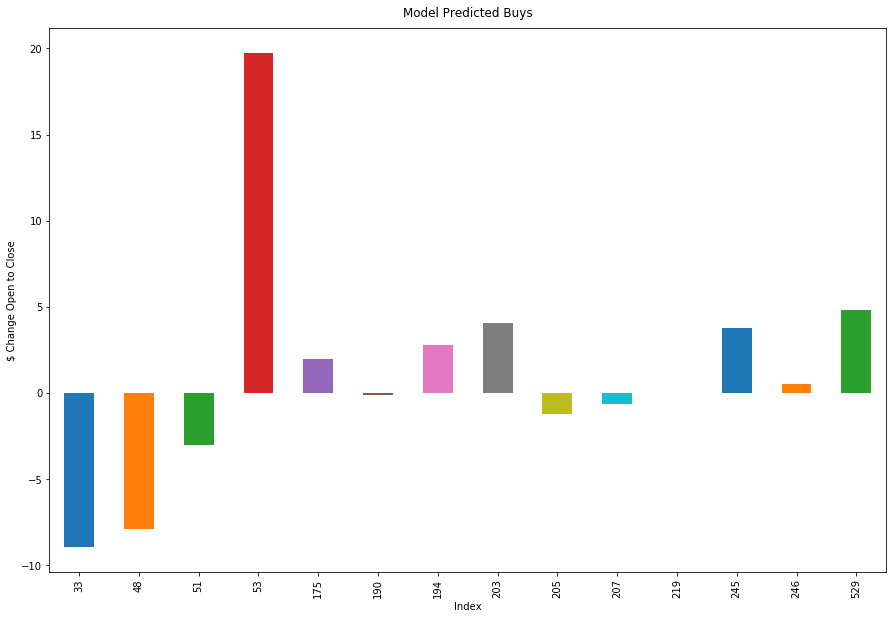

In [57]:
fig, ax = plt.subplots(figsize=(15,10))
rf[rf['predicted']==1]['$ chg'].plot(kind='bar')
ax.set_title('Model Predicted Buys', y=1.01)
ax.set_ylabel('$ Change Open to Close')
ax.set_xlabel('Index')

## Further test model, lowered threshold from 1 to .25

In [58]:
X_train, X_test = X[550:], X[:550]
y_train = ipos['$ Chg Open to Close'][550:].map(lambda x: 1 if x >= .25 else 0)
y_test = ipos['$ Chg Open to Close'][:550].map(lambda x: 1 if x >= .25 else 0)
clf = linear_model.LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7036363636363636

In [59]:
pred_label = clf.predict(X_test)
results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index,
ipos.loc[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])
rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted','actual', 'correct'])
rf[rf['predicted']==1]['$ chg'].describe()

count    82.000000
mean      0.367317
std       3.771702
min      -8.950000
25%      -1.377500
50%       0.095000
75%       1.710000
max      19.750000
Name: $ chg, dtype: float64

In [60]:
X_train, X_test = X[132:], X[:132]
y_train = ipos['$ Chg Open to Close'][132:].map(lambda x: 1 if x >= .25 else 0)
y_test = ipos['$ Chg Open to Close'][:132].map(lambda x: 1 if x >= .25 else 0)
clf = linear_model.LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7045454545454546

In [61]:
pred_label = clf.predict(X_test)
results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index,
ipos.loc[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])
rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted','actual', 'correct'])
rf[rf['predicted']==1]['$ chg'].describe()

count    17.000000
mean      0.220000
std       6.517486
min      -8.950000
25%      -3.000000
50%       0.190000
75%       1.550000
max      19.750000
Name: $ chg, dtype: float64

## Feature importance

In [62]:
fv = pd.DataFrame(X_train.columns, clf.coef_.T).reset_index()
fv.columns = ['Coef', 'Feature']
fv.sort_values('Coef', ascending=0).reset_index(drop=True)

,Coef,Feature
0,1.270840,"Q(""Lead Mgr"")[T.BMO Capital Markets]"
1,1.112183,"Q(""Lead Mgr"")[T.Robertson Stephens]"
2,0.930096,"Q(""Lead Mgr"")[T.Wachovia]"
3,0.908970,"Q(""Lead Mgr"")[T.C.E. Unterberg, Towbin]"
4,0.808721,"Q(""Lead Mgr"")[T.China International]"
5,0.750321,"Q(""Lead Mgr"")[T.Donaldson Lufkin & Jenrette]"
6,0.746595,"Q(""Lead Mgr"")[T.ING Barings]"
7,0.673585,"Q(""Lead Mgr"")[T.Anderson & Strudrick]"
8,0.660473,"Q(""Lead Mgr"")[T.Burnham Securities]"
9,0.658631,"Q(""Lead Mgr"")[T.Salomon Smith Barney]"


In [63]:
fv[fv['Feature'].str.contains('Week Day')]

,Coef,Feature
12,-0.044570,"Q(""Week Day"")[T.Mon]"
13,0.067810,"Q(""Week Day"")[T.Thurs]"
14,-0.081198,"Q(""Week Day"")[T.Tues]"
15,-0.070326,"Q(""Week Day"")[T.Wed]"


In [64]:
ipos[ipos['Lead Mgr'].str.contains('Keegan|Towbin')]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,...,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month,Gap Open Pct,Open to Close Pct
1521,2011-06-22,Fidus Investment,FDUS,Morgan Keegan,15.0,14.75,15.00,0.00,0.25,0.00,...,0.25,1.694915,-24.574776,18.275183,Morgan Keegan,1,Wed,Jun,-1.694915,1.694915
1873,2007-02-26,Rosetta Genomics,ROSG,"C.E. Unterberg, Towbin",7.0,7.02,7.32,4.57,0.02,0.32,...,0.30,4.273504,-37.949291,26.738346,"C.E. Unterberg, Towbin",1,Mon,Feb,0.284900,4.273504
2463,2005-08-04,Advanced Life Sciences,ADLS,"C.E. Unterberg, Towbin/ThinkEquity Partners",5.0,5.03,6.00,20.00,0.03,1.00,...,0.97,19.284294,-21.893526,13.326601,"C.E. Unterberg, Towbin",2,Thurs,Aug,0.596421,19.284294
2911,2002-05-21,Computer Programs and Systems,CPSI,Morgan Keegan/Raymond James,16.5,17.50,18.12,9.82,1.00,1.62,...,0.62,3.542857,22.512341,-16.830051,Morgan Keegan,2,Tues,May,5.714286,3.542857
2992,2001-05-23,Smith & Wollensky,SWRG,CE Unterberg Towbin,8.5,8.51,7.77,-8.59,0.01,0.73,...,-0.74,-8.695652,4.346702,-4.693344,CE Unterberg Towbin,1,Wed,May,0.117509,-8.695652
3050,2001-12-14,Northwest Biotherapeutics,NWBT,"C.E. Unterberg, Towbin",5.0,5.10,5.31,6.20,0.10,0.31,...,0.21,4.117647,8.099422,-16.522118,"C.E. Unterberg, Towbin",1,Fri,Dec,1.960784,4.117647
3182,2000-08-09,Millennium Cell,MCEL,Morgan Keegan,10.0,10.00,10.00,0.00,0.00,0.00,...,0.00,0.000000,120.447117,-48.112116,Morgan Keegan,1,Wed,Aug,0.000000,0.000000
3212,2000-08-25,ServiceWare Technologies,SVCW,"C.E. Unterberg, Towbin",7.0,8.50,8.75,25.00,1.50,1.75,...,0.25,2.941176,180.301695,-47.531383,"C.E. Unterberg, Towbin",1,Fri,Aug,17.647059,2.941176


## Used Random Forest to see feature importance

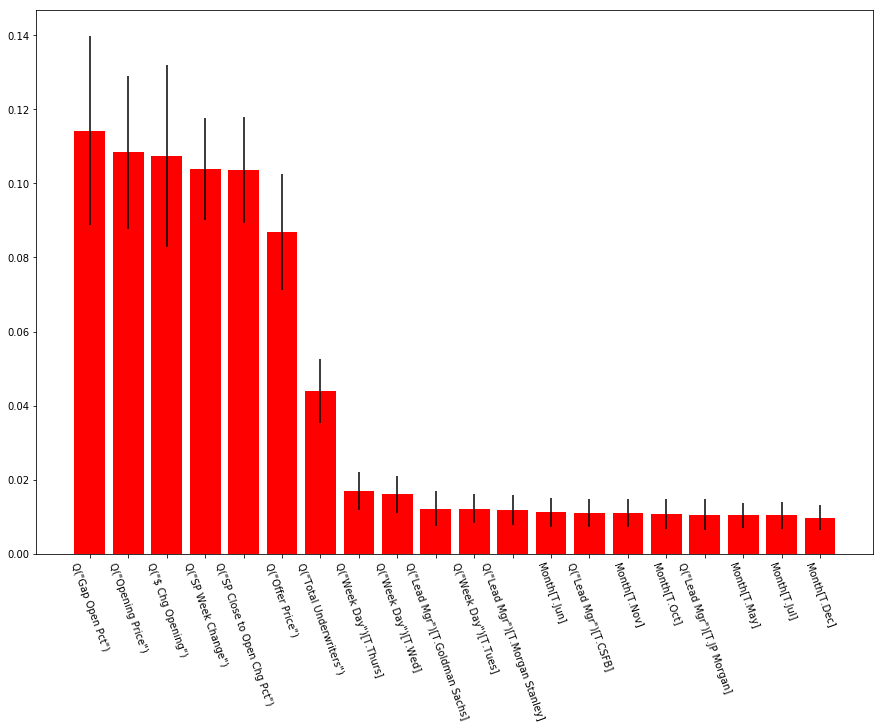

In [65]:
clf_rf = RandomForestClassifier(n_estimators=1000)
clf_rf.fit(X_train, y_train)
f_importances = clf_rf.feature_importances_
f_names = X_train
f_std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)
zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)
imps = [x[0] for x in zzs[:20]]
labels = [x[1] for x in zzs[:20]]
errs = [x[2] for x in zzs[:20]]
plt.subplots(figsize=(15,10))
plt.bar(range(20), imps, color="r", yerr=errs, align="center")
plt.xticks(range(20), labels, rotation=-70);